<a href="https://colab.research.google.com/github/Astra-exe/coffee-sales/blob/main/Coffe_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
coffe_data = pd.read_csv('/content/drive/MyDrive/Datasets_mios/Coffe_Sales.csv')

In [ ]:
coffe_data.shape

(1464, 6)

In [ ]:
coffe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


In [ ]:
coffe_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
coffe_data.describe()

,money
count,1464.000000
mean,32.013661
std,5.317022
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


##Valores faltantes y duplicados

In [ ]:
coffe_data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
coffe_data.duplicated().sum()

0

##Valores unicos de cada columna

In [ ]:
unique_values = {col: coffe_data[col].unique() for col in coffe_data.columns}
unique_values

{'date': array(['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04',
        '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08',
        '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
        '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16',
        '2024-03-17', '2024-03-18', '2024-03-19', '2024-03-20',
        '2024-03-21', '2024-03-22', '2024-03-23', '2024-03-24',
        '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28',
        '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01',
        '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
        '2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09',
        '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13',
        '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
        '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21',
        '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
        '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29',
        '2024-04-30', '2024-05-0

#Limpieza de datos

Eliminando columna que no aporta mucha información (Card number)

In [ ]:
coffe_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
coffe_data.drop('card', axis=1, inplace=True)
coffe_data.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


**Valores unicos de las columnas que no son fechas**

In [ ]:
unique_values = {col: coffe_data[col].unique() for col in coffe_data[['cash_type','money','coffee_name']]}
unique_values

{'cash_type': array(['card', 'cash'], dtype=object),
 'money': array([38.7 , 28.9 , 33.8 , 40.  , 24.  , 35.  , 30.  , 25.  , 32.82,
        39.  , 37.72, 27.92, 29.  , 34.  , 23.02, 18.12]),
 'coffee_name': array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
        'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)}

**Verificar limpieza de datos**

In [ ]:
coffe_data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
money,0
coffee_name,0


In [ ]:
coffe_data.duplicated().sum()

0

In [ ]:
coffe_data.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


**Cambiar el tipo de dato a fecha en las dos primeras columnas**

In [ ]:
coffe_data['date'] = pd.to_datetime(coffe_data['date'])
coffe_data['datetime'] = pd.to_datetime(coffe_data['datetime'])

In [ ]:
coffe_data.dtypes

,0
date,datetime64[ns]
datetime,datetime64[ns]
cash_type,object
money,float64
coffee_name,object


Eliminar la columna date y de datetime sacar las columnas fecha y hora

In [ ]:
coffe_data.drop('date', axis=1, inplace=True)

In [ ]:
coffe_data['date'] = coffe_data['datetime'].dt.date
coffe_data['time'] = coffe_data['datetime'].dt.time

In [ ]:
coffe_data['date'] = pd.to_datetime(coffe_data['date'])

In [ ]:
coffe_data.drop('datetime', axis=1, inplace=True)

In [ ]:
coffe_data.dtypes

,0
cash_type,object
money,float64
coffee_name,object
date,datetime64[ns]
time,object


In [ ]:
coffe_data.head()

,cash_type,money,coffee_name,date,time
0,card,38.7,Latte,2024-03-01,10:15:50.520000
1,card,38.7,Hot Chocolate,2024-03-01,12:19:22.539000
2,card,38.7,Hot Chocolate,2024-03-01,12:20:18.089000
3,card,28.9,Americano,2024-03-01,13:46:33.006000
4,card,38.7,Latte,2024-03-01,13:48:14.626000


Trabajando la hora para redondear, sin ser específicos, esto nos ayudará a ver la hora del día donde hay más ventas, eliminando minutos y segundos y dejando solo la hora del dia.

In [ ]:
coffe_data['time'] = coffe_data['time'].astype(str)
coffe_data['time'] = coffe_data['time'].str.slice(0, 2)
coffe_data['time'] = pd.to_datetime(coffe_data['time'], format='%H').dt.time

In [ ]:
coffe_data.head()

,cash_type,money,coffee_name,date,time
0,card,38.7,Latte,2024-03-01,10:00:00
1,card,38.7,Hot Chocolate,2024-03-01,12:00:00
2,card,38.7,Hot Chocolate,2024-03-01,12:00:00
3,card,28.9,Americano,2024-03-01,13:00:00
4,card,38.7,Latte,2024-03-01,13:00:00


In [ ]:
coffe_data.dtypes

,0
cash_type,object
money,float64
coffee_name,object
date,datetime64[ns]
time,object


In [ ]:
#Ver que hora hay más ventas
coffe_data['time'].value_counts()

,count
time,
10:00:00,159
11:00:00,141
12:00:00,114
19:00:00,113
17:00:00,94
13:00:00,93
21:00:00,93
16:00:00,91
18:00:00,90


In [ ]:
coffe_data['date'].dt.year.unique()

array([2024], dtype=int32)

In [ ]:
coffe_data['date'].dt.month.unique()

array([3, 4, 5, 6, 7, 8, 9], dtype=int32)

#Reestructuración de datos

Podemos ver que las ventas solo son del año 2024. Podemos reestructurar la data y hacer una nueva columna, para ver en qúe mes y que día se está vendiendo.

In [ ]:
coffe_data['month'] = coffe_data['date'].dt.month
coffe_data['day'] = coffe_data['date'].dt.day
coffe_data.drop('date', axis=1, inplace=True)

In [ ]:
coffe_data.head()

,cash_type,money,coffee_name,time,month,day
0,card,38.7,Latte,10:00:00,3,1
1,card,38.7,Hot Chocolate,12:00:00,3,1
2,card,38.7,Hot Chocolate,12:00:00,3,1
3,card,28.9,Americano,13:00:00,3,1
4,card,38.7,Latte,13:00:00,3,1


In [ ]:
coffe_data.dtypes

,0
cash_type,object
money,float64
coffee_name,object
time,object
month,int32
day,int32


In [ ]:
sales_coffee_2024 = coffe_data.copy()

In [ ]:
sales_coffee_2024.head()

,cash_type,money,coffee_name,time,month,day
0,card,38.7,Latte,10:00:00,3,1
1,card,38.7,Hot Chocolate,12:00:00,3,1
2,card,38.7,Hot Chocolate,12:00:00,3,1
3,card,28.9,Americano,13:00:00,3,1
4,card,38.7,Latte,13:00:00,3,1


In [ ]:
#Crear una columna con el nombre de cada més en lugar del numero
sales_coffee_2024['month_name'] = pd.to_datetime(sales_coffee_2024['month'], format='%m').dt.strftime('%B')
sales_coffee_2024.drop('month', axis=1, inplace=True)
sales_coffee_2024.head()

,cash_type,money,coffee_name,time,day,month_name
0,card,38.7,Latte,10:00:00,1,March
1,card,38.7,Hot Chocolate,12:00:00,1,March
2,card,38.7,Hot Chocolate,12:00:00,1,March
3,card,28.9,Americano,13:00:00,1,March
4,card,38.7,Latte,13:00:00,1,March


In [ ]:
#Reordenar las columnas: [coffee_name, money, cash_type, day, month_name, time]
sales_coffee_2024 = sales_coffee_2024[['coffee_name', 'money', 'cash_type', 'day', 'month_name', 'time']]
sales_coffee_2024.head()

,coffee_name,money,cash_type,day,month_name,time
0,Latte,38.7,card,1,March,10:00:00
1,Hot Chocolate,38.7,card,1,March,12:00:00
2,Hot Chocolate,38.7,card,1,March,12:00:00
3,Americano,28.9,card,1,March,13:00:00
4,Latte,38.7,card,1,March,13:00:00


#Análisis Exploratorio

In [ ]:
sales_coffee_2024.head()

,coffee_name,money,cash_type,day,month_name,time
0,Latte,38.7,card,1,March,10:00:00
1,Hot Chocolate,38.7,card,1,March,12:00:00
2,Hot Chocolate,38.7,card,1,March,12:00:00
3,Americano,28.9,card,1,March,13:00:00
4,Latte,38.7,card,1,March,13:00:00


In [ ]:
#Ventas por mes
sales_by_month = sales_coffee_2024.groupby('month_name')['money'].sum()
sales_by_month

,money
month_name,
April,6720.56
August,7613.84
July,6915.94
June,7758.76
March,7050.20
May,9063.42
September,1745.28


In [ ]:
#ventas por tipo de pago
sales_by_cash_type = sales_coffee_2024.groupby('cash_type')['money'].sum()
sales_by_cash_type

,money
cash_type,
card,43682.0
cash,3186.0


In [ ]:
#Cuanto dinero dejó cada tipo de cafe
money_by_coffee_name = sales_coffee_2024.groupby('coffee_name')['money'].sum()
money_by_coffee_name

,money
coffee_name,
Americano,5657.42
Americano with Milk,11198.50
Cappuccino,8744.40
Cocoa,1821.06
Cortado,3711.92
Espresso,1354.30
Hot Chocolate,2975.40
Latte,11405.00


In [ ]:
#Que cafe se vende más
sales_by_coffee_name = sales_coffee_2024['coffee_name'].value_counts()
sales_by_coffee_name

,count
coffee_name,
Americano with Milk,361
Latte,316
Cappuccino,239
Americano,213
Cortado,141
Hot Chocolate,80
Espresso,63
Cocoa,51


##Visualización de datos

In [ ]:
sales_coffee_2024.head()

,coffee_name,money,cash_type,day,month_name,time
0,Latte,38.7,card,1,March,10:00:00
1,Hot Chocolate,38.7,card,1,March,12:00:00
2,Hot Chocolate,38.7,card,1,March,12:00:00
3,Americano,28.9,card,1,March,13:00:00
4,Latte,38.7,card,1,March,13:00:00


In [ ]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[1, 1])

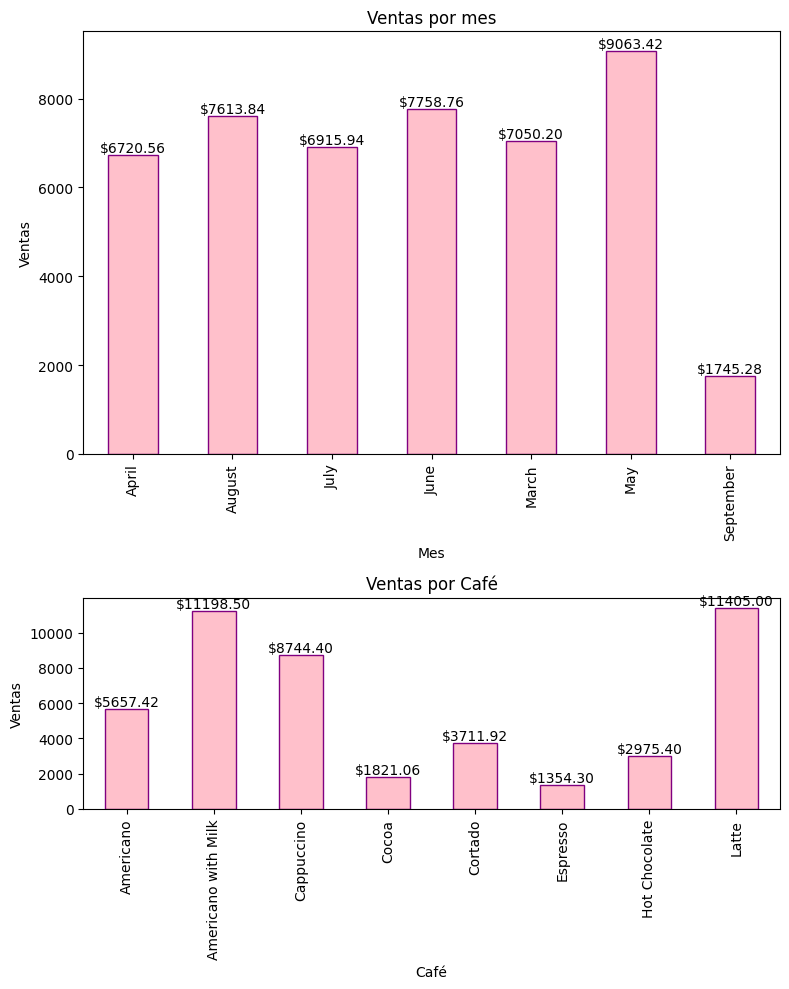

In [ ]:
fig = plt.figure(figsize=(8, 10))

#Primer subplot de ventas por mes
ax1 = fig.add_subplot(gs[0,:])
sales_by_month.plot(kind='bar', ax=ax1, color = 'pink', edgecolor = 'purple')
ax1.set_title('Ventas por mes')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ventas')
# Añadir los valores encima de cada barra
for i in ax1.patches:
    ax1.text(
        i.get_x() + i.get_width() / 2,  # Posición x
        i.get_height(),  # Posición y
        f'${i.get_height():.2f}',  # Texto a mostrar
        ha='center',  # Alinear horizontalmente al centro
        va='bottom'  # Alinear verticalmente al fondo
    )


#Segundo subplot igual al anterior para ver ahora las ventas por café
ax2 = fig.add_subplot(gs[1,:])
money_by_coffee_name.plot(kind='bar', ax=ax2, color = 'pink', edgecolor = 'purple')
ax2.set_title('Ventas por Café')
ax2.set_xlabel('Café')
ax2.set_ylabel('Ventas')
# Añadir los valores encima de cada barra
for i in ax2.patches:
    ax2.text(
        i.get_x() + i.get_width() / 2,  # Posición x
        i.get_height(),  # Posición y
        f'${i.get_height():.2f}',  # Texto a mostrar
        ha='center',  # Alinear horizontalmente al centro
        va='bottom'  # Alinear verticalmente al fondo
    )

plt.tight_layout()
plt.show()

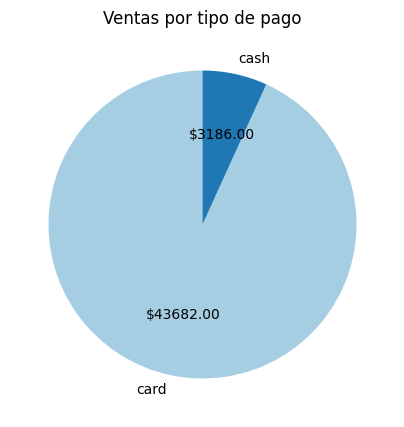

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(
    sales_by_cash_type,
    labels=sales_by_cash_type.index,
    startangle=90,  # Rotar la gráfica para que comience desde arriba
    colors=plt.cm.Paired.colors,  # Colores automáticos
    autopct=lambda p: f'${p * sum(sales_by_cash_type) / 100:.2f}'
)
plt.title('Ventas por tipo de pago')
plt.show()

Text(0, 0.5, 'Ventas')

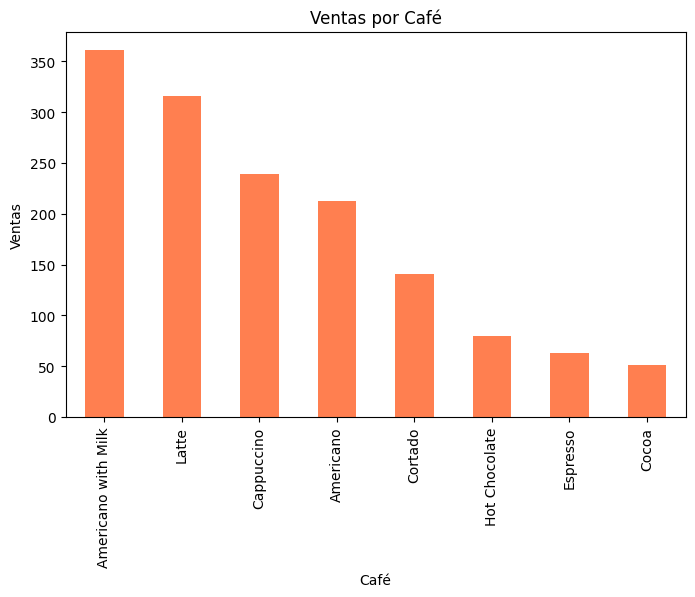

In [ ]:
#Que cafe se vende mas
plt.figure(figsize=(8, 5))
sales_by_coffee_name.plot(kind='bar', color = 'coral')
plt.title('Ventas por Café')
plt.xlabel('Café')
plt.ylabel('Ventas')

Aquí podemos ver que el café que se vende mas es el ameicano con leche pero el que recaudó más dinero es el Latte.

**Conclusión: El latte es más caro**

In [ ]:
sales_coffee_2024.head()

,coffee_name,money,cash_type,day,month_name,time
0,Latte,38.7,card,1,March,10:00:00
1,Hot Chocolate,38.7,card,1,March,12:00:00
2,Hot Chocolate,38.7,card,1,March,12:00:00
3,Americano,28.9,card,1,March,13:00:00
4,Latte,38.7,card,1,March,13:00:00


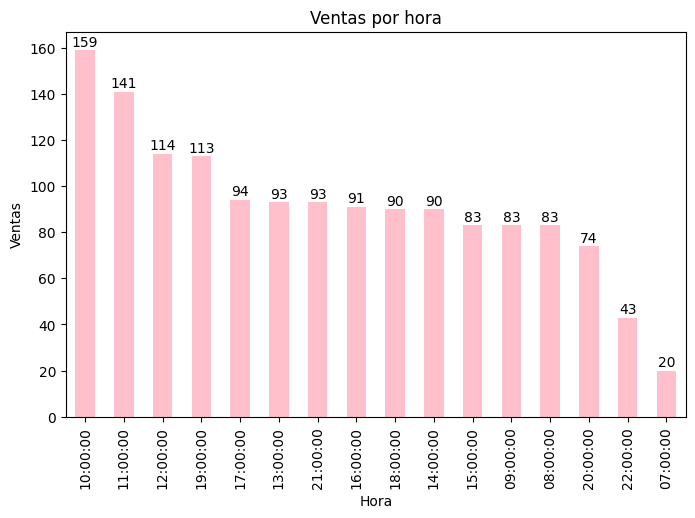

In [ ]:
#A que hora del día se vende más
time = sales_coffee_2024['time'].value_counts()
plt.figure(figsize=(8, 5))
bars = time.plot(kind='bar', color = 'pink')
plt.title('Ventas por hora')
plt.xlabel('Hora')
plt.ylabel('Ventas')

for i in bars.patches:
    plt.text(
        i.get_x() + i.get_width() / 2,  # Posición x
        i.get_height() + 0.5,  # Ajustar un poco hacia arriba de la barra
        f'{i.get_height()}',  # Texto a mostrar
        ha='center',  # Alinear horizontalmente al centro
        va='bottom'  # Alinear verticalmente al fondo
    )

plt.show()

En general, se vende más café al rededor de las 10:00 AM que en cualquier otra hora.

De una vista más general, a las personas les gusta más comprar café por las mañanas.